In [21]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import d2lzh_pytorch as d2l

n_train, n_test, num_inputs = 20, 100, 200  # 训练样本少，明显多拟合
true_w, true_b = torch.ones(num_inputs, 1) * 0.01, 0.05 

features = torch.randn((n_train + n_test, num_inputs)) # 数据集与标签
labels = torch.matmul(features, true_w) + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train, :], labels[n_train:, :]

# 从0开始实现
通过在目标函数下添加L2泛数实现权重衰减

# 初始化模型参数

In [22]:
def init_params():
    w = torch.randn((num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

# 定义L2惩罚项

In [23]:
def l2_penalty(w):
    return (w ** 2).sum() / 2

# 定义训练和测试

In [24]:
from torch.utils import data
batch_size, num_epochs, lr = 1, 100, 0.003  # 对于一个样本，就进行一次反向传播
net, loss = d2l.linreg, d2l.squared_loss

dataset = torch.utils.data.TensorDataset(train_features, train_labels)
train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)

def fit_and_plot(lambd):    # lambd是L2正则化的参数
    w, b = init_params()
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X,y in train_iter:
            l = loss(net(X, w, b), y) + lambd * l2_penalty(w)
            l = l.sum()
            
            if w.grad is not None:
                w.grad.data.zero_()
                b.grad.data.zero_()
            l.backward()
            d2l.sgd([w, b], lr, batch_size)
        train_ls.append(loss(net(train_features, w, b), train_labels).mean().item())    # 在实际计算误差的时候，我们又没有考虑到这个l2正则化
        test_ls.append(loss(net(test_features, w, b), test_labels).mean().item())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss', range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', w.norm().item())
                

# 观察过拟合

L2 norm of w: 12.904123306274414


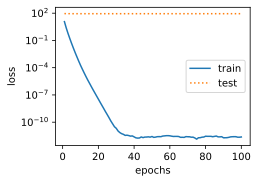

In [25]:
fit_and_plot(lambd=0) # 相当于没有正则化

# 使用权重衰减

L2 norm of w: 0.03448907285928726


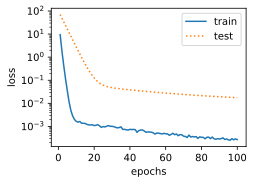

In [26]:
fit_and_plot(3)